In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from arch import arch_model
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [5]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


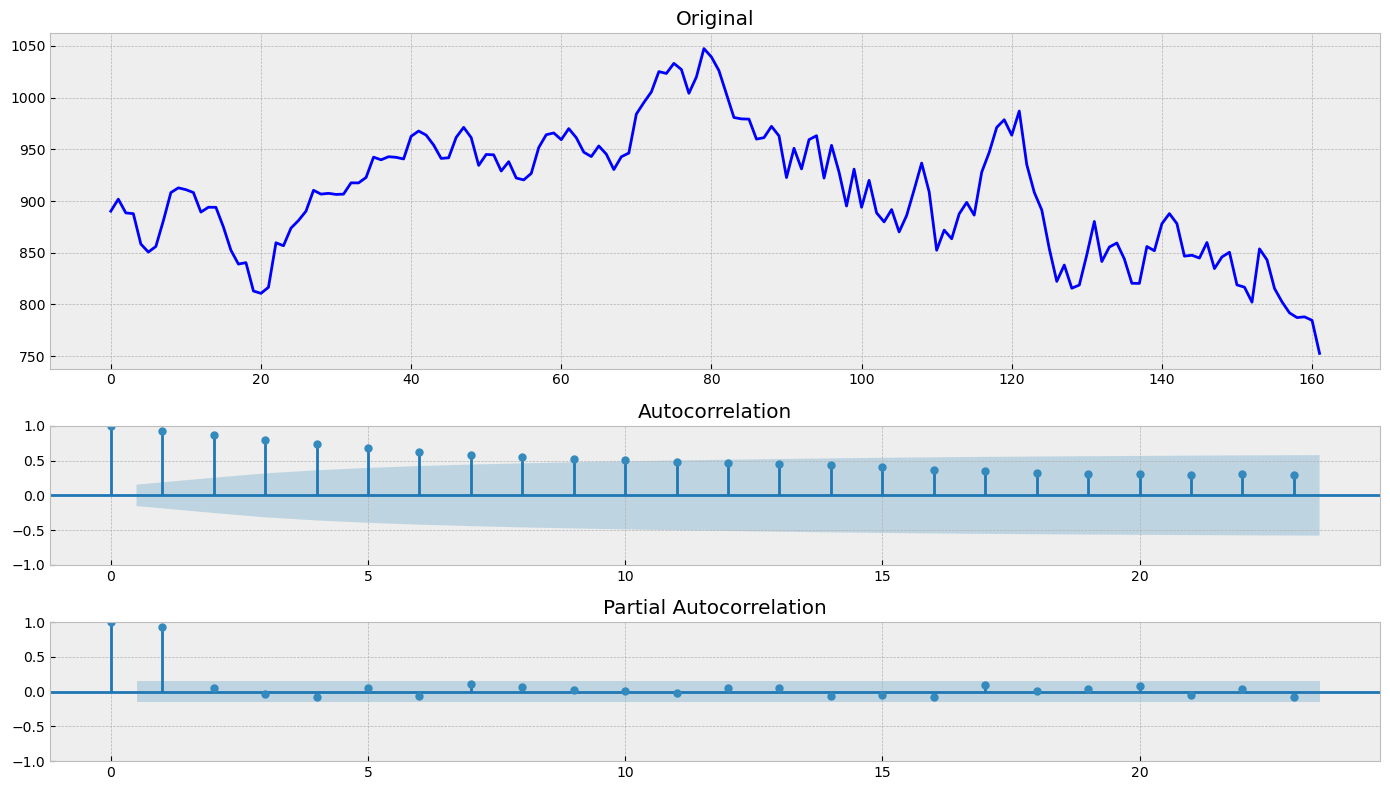

In [6]:
trading = pd.read_csv(r'C:\Users\79169\Desktop\домашка\ts\Series\weekly-closings-of-the-dowjones-.csv')['Close']
tsplot(trading)

In [7]:
model = arch_model(trading, vol='Garch', p=2, q=2)
results = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 855.0987091649126
Iteration:      2,   Func. Count:     15,   Neg. LLF: 857.3677764790797
Iteration:      3,   Func. Count:     23,   Neg. LLF: 978.9239506607075
Iteration:      4,   Func. Count:     32,   Neg. LLF: 854.0733166076072
Iteration:      5,   Func. Count:     39,   Neg. LLF: 854.0695174777011
Iteration:      6,   Func. Count:     46,   Neg. LLF: 854.0655233185912
Iteration:      7,   Func. Count:     53,   Neg. LLF: 854.046375368348
Iteration:      8,   Func. Count:     60,   Neg. LLF: 854.0340939029836
Iteration:      9,   Func. Count:     67,   Neg. LLF: 854.0291222214505
Iteration:     10,   Func. Count:     74,   Neg. LLF: 854.0285175637603
Iteration:     11,   Func. Count:     81,   Neg. LLF: 854.0285006580947
Iteration:     12,   Func. Count:     88,   Neg. LLF: 854.0284994142662
Iteration:     13,   Func. Count:     95,   Neg. LLF: 854.0284981551918
Iteration:     14,   Func. Count:    102,   Neg. LLF: 854.0284929

In [8]:
# Вывод оценок параметров
print(results.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -854.018
Distribution:                  Normal   AIC:                           1720.04
Method:            Maximum Likelihood   BIC:                           1738.56
                                        No. Observations:                  162
Date:                Sat, Dec 02 2023   Df Residuals:                      161
Time:                        15:24:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           909.0739     14.742     61.666      0.000 [8.

In [9]:
forecast_horizon = len(val)
forecasts = results.forecast(start=results.conditional_volatility.shape[0], horizon=forecast_horizon)

NameError: name 'val' is not defined

In [ ]:
results.conditional_volatility.shape[0]

162

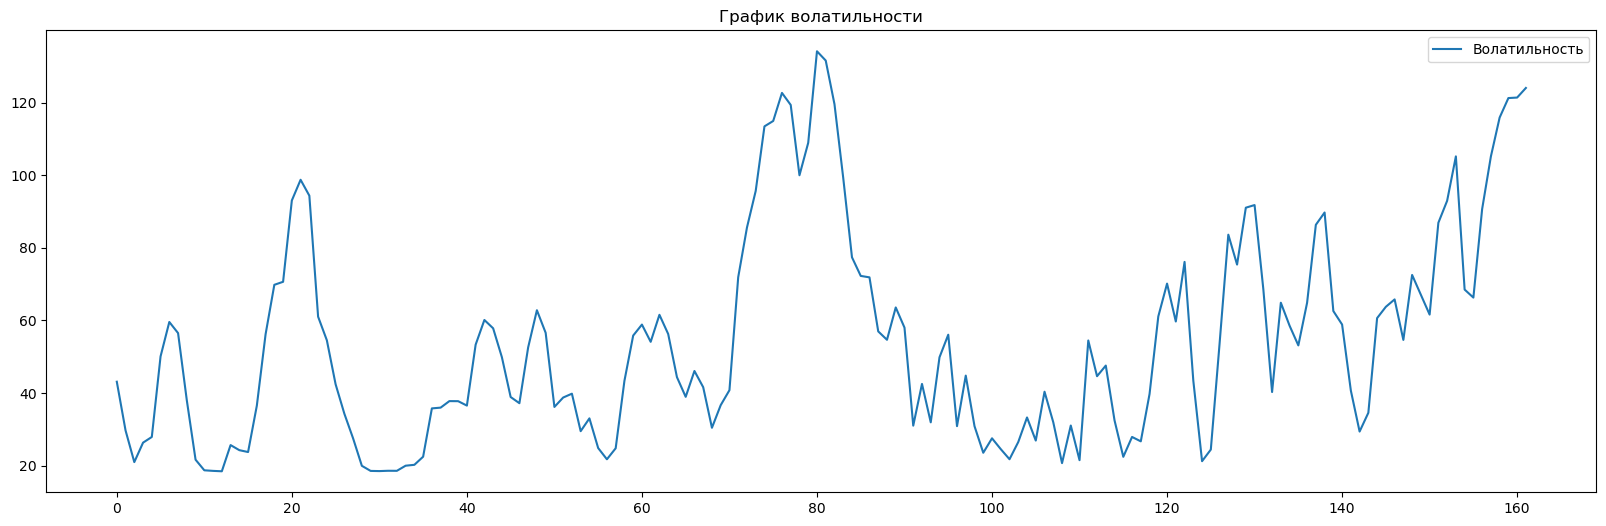

In [17]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.plot(results.conditional_volatility, label='Волатильность')
ax.set_title('График волатильности')
plt.legend()
plt.show()

При анализе мы видим, что зачастую при резком падении/взлете индекса (нашего временного ряда) резко повышается волатильность - что может быть черевато для позиций трейдеров/инвесторов

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


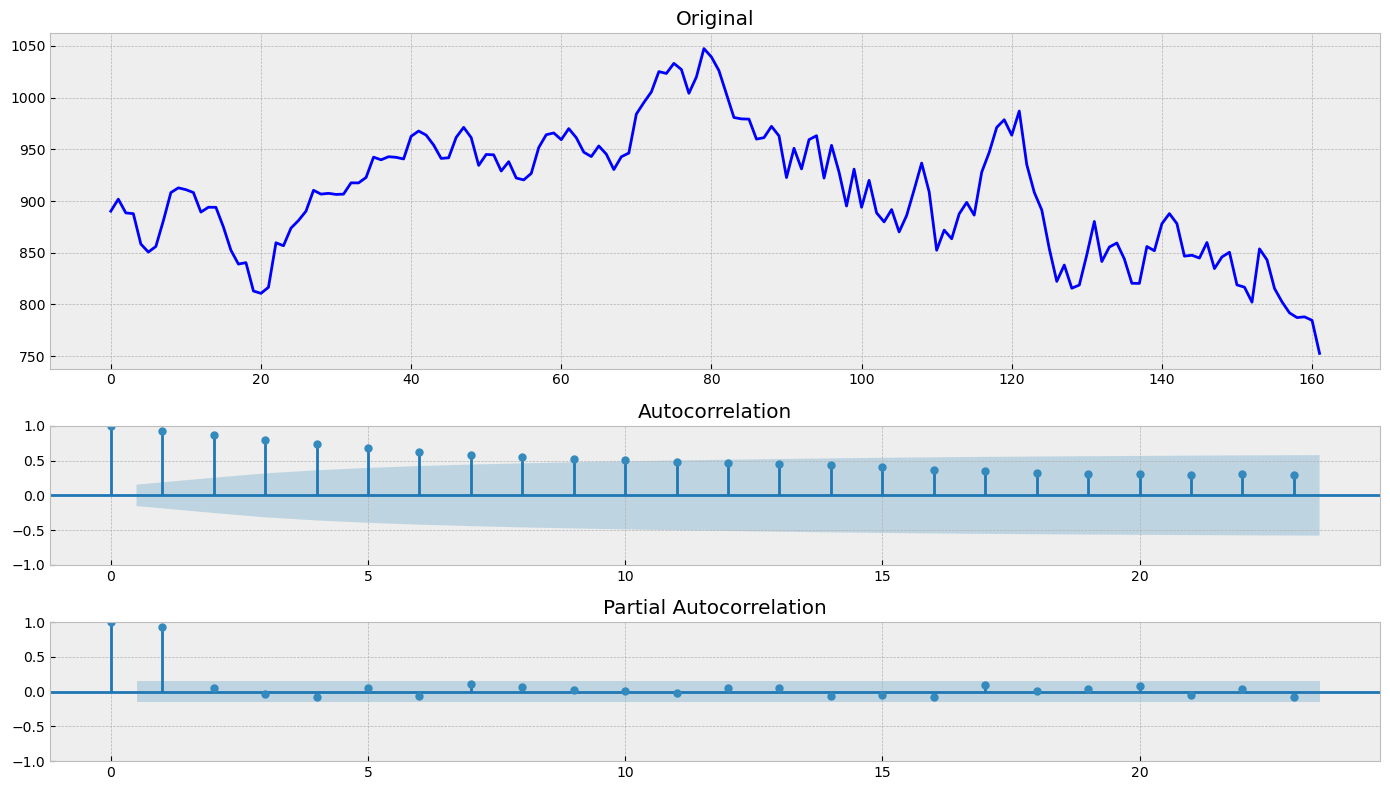

In [10]:
tsplot(trading)

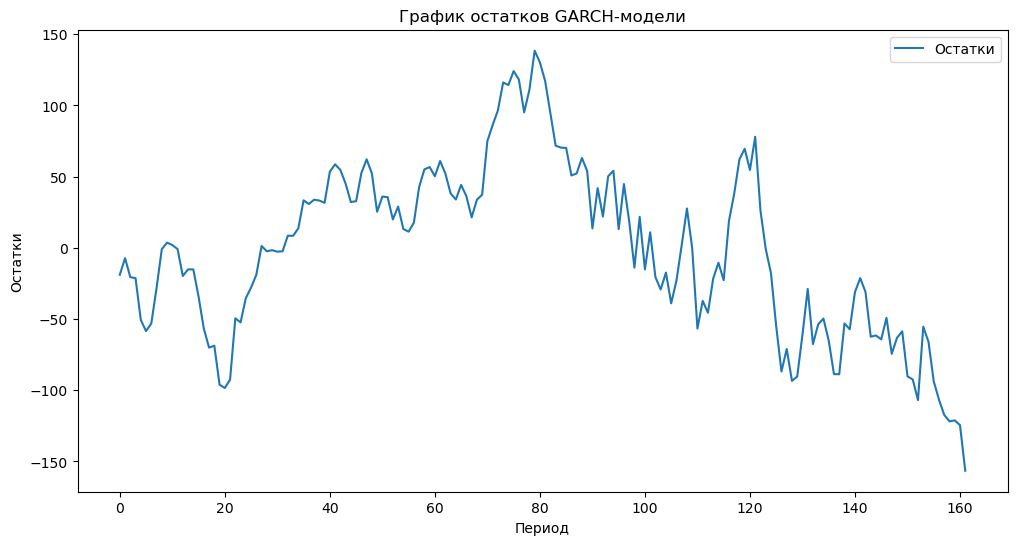

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Остатки')
plt.title('График остатков GARCH-модели')
plt.xlabel('Период')
plt.ylabel('Остатки')
plt.legend()
plt.show()